# Tweet sentimnet

In [28]:
import pandas as pd
import os
import json
import numpy as np
import matplotlib
from textblob import TextBlob
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy
from spacy import displacy
import re 
from urllib.parse import urlparse
import http.client as httplib
import urllib.parse as urlp
from tqdm.notebook import tqdm
from textstat import flesch_reading_ease
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim
import gensim
from wordcloud import WordCloud, STOPWORDS

In [2]:
path = "./hydrated/"
files = os.listdir(path)
tweets = []
for i in files:
    if i == ".DS_Store" or i == ".ipynb_checkpoints":
        continue
    tweets_per_file = []
    with open(path+i, 'r') as read:
        tweets_per_file = json.loads(read.read())
    for j in tweets_per_file:
        tweets.append(j)
print(len(tweets))
#tweets to a dataframe
df = pd.DataFrame (tweets)
df.head()

793


,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorited,retweeted,lang,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,extended_entities
0,Thu Apr 09 22:22:30 +0000 2020,1248375762475864065,1248375762475864065,@ukreloaded James spot on YES CHINA is to blam...,False,"[12, 290]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.248368e+18,1248368432485203969,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Apr 09 22:48:52 +0000 2020,1248382399907377156,1248382399907377156,RT @detikHealth: Gejala Virus Corona Vs Demam ...,False,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,False,False,in,{'created_at': 'Thu Apr 09 22:14:05 +0000 2020...,False,NaN,NaN,NaN,NaN,NaN
2,Thu Apr 09 21:24:12 +0000 2020,1248361093002489857,1248361093002489857,"@lynlinking One thing we don’t know yet, is wh...",False,"[12, 150]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.248360e+18,1248359561641091073,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Apr 09 18:17:03 +0000 2020,1248313996589043712,1248313996589043712,RT @MrSpyBR: @CNNBrasil Este Sr. maliciosament...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,False,False,pt,{'created_at': 'Thu Apr 09 15:39:52 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Apr 09 18:32:45 +0000 2020,1248317943915651075,1248317943915651075,"RT @bennyjohnson: After China Virus dies, US s...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,False,False,en,{'created_at': 'Thu Apr 09 14:51:48 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN


# Below is the average number of characters in the text

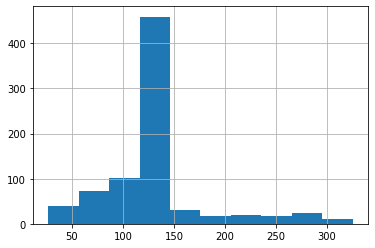

In [3]:
df['full_text'].str.len().hist()

# sentiment

In [4]:
#this is probably not very usefull.... at all
polarity = 0
list_of_tweets = df['full_text'].tolist()
for i in list_of_tweets:
    polarity += TextBlob(i).sentiment.polarity
round(polarity/len(list_of_tweets)*100)/100

0.07

Looks likes the majority is in the positive... well just over


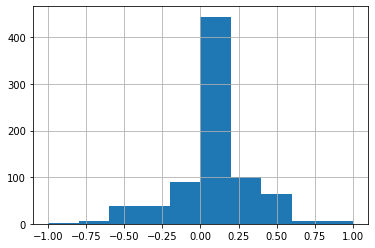

In [5]:
def get_sent(text):
    return TextBlob(text).sentiment.polarity

tweet_senti_values = df['full_text'].apply(lambda x : get_sent(x))
tweet_senti_values.hist()
print("Looks likes the majority is in the positive... well just over")

can we assume that this is wrong


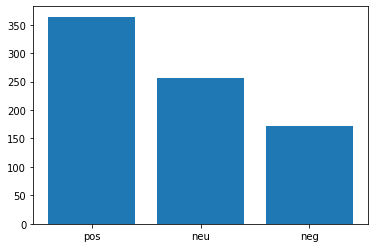

In [6]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos' 
    
tweet_senti_values_polarity = tweet_senti_values.map(lambda x: sentiment(x))
#tweet_senti_values_polarity.head()
plt.bar(tweet_senti_values_polarity.value_counts().index, tweet_senti_values_polarity.value_counts()) 
print("can we assume that this is wrong")

# Download stop words (we will add more words later)

In [7]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus = []
new = df['full_text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

The most popular words, not very importnat we must remove stop words


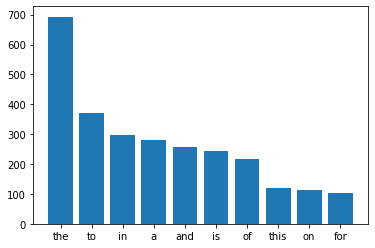

In [9]:
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y = zip(*top)
plt.bar(x,y)
print("The most popular words, not very importnat we must remove stop words")

('China', 130)
('Wuhan', 95)
('corona', 94)
('Virus', 61)
('Corona', 61)
('people', 61)
('Chinese', 44)
('asked', 43)
('since', 42)
('This', 42)
('scared', 39)
('infected', 38)
('like', 37)
('airport', 37)
('high', 37)
('@maddieegwynette:', 36)
('Starbucks', 36)
('worker', 36)
('KKIA', 36)
('alert', 36)


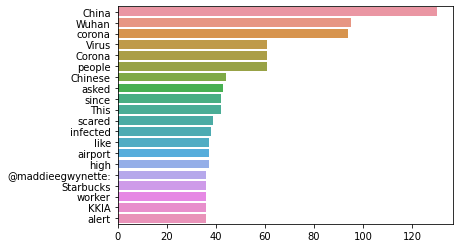

In [10]:
#from collections import  Counter (this is what it is using)
counter = Counter(corpus)
mostCommonWords = counter.most_common()
x, y = [], []

# we have to add the below because ya... we do not want RT -> obs 
stop.add("RT")
stop.add("The")
stop.add("new")
stop.add("-")
stop.add("I")
stop.add(".")
stop.add("virus")
stop.add("http")

#mostCommonWords[:40]

for word, count in mostCommonWords[:60]:
    if (word not in stop):
        x.append(word)
        y.append(count)
sns.barplot (x = y, y = x)

for i in zip(x,y):
    print(i)
    
#https://twitter.com/maddieegwynette?lang=en some random twitter profile...i wonder why this is the case

# Named Entity Recognition

In [11]:
#YOU MUST FIRST RUN THIS COMMAND python3 -m spacy download en_core_web_sm
# nlp = spacy.load("en_core_web_sm") -> this command does not seem to work(stck over flow  and below wrk)
nlp = spacy.load('en')
doc = nlp('South Africa and Canada are going to talk next thursday')
[(x.text,x.label_) for x in doc.ents]
#displacy.render(doc, style='ent')

[('South Africa', 'GPE'), ('Canada', 'GPE'), ('next thursday', 'DATE')]

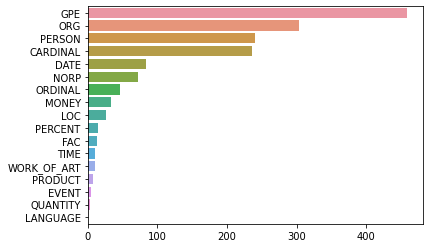

In [12]:
def ner(text):
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

ent = df['full_text'].apply(lambda x : ner(x))
ent = [x for sub in ent for x in sub]
counter = Counter(ent)
counter
count = counter.most_common()
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

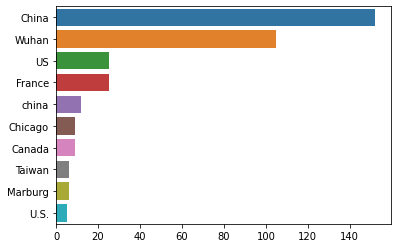

In [13]:
def display(ents):
    def ner(text,ent=ents):
        doc = nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    gpe = df['full_text'].apply(lambda x: ner(x))
    gpe = [i for x in gpe for i in x]
    counter = Counter(gpe)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x)

display("GPE")
#display("ORG")
#display("PERSON") # this does not work so well, it think corona is a person
#display("CARDINAL")
#display("DATE")
#display("NORP")
#display("MONEY") # nor does this work at all...
#display("LOC")

# Domains

In [14]:
# https://www.geeksforgeeks.org/python-check-url-string/
#GrOss Regex 
def find(string): 
    # findall() has been used  
    # with valid conditions for urls in string 
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)       
    return [x[0] for x in url]
find("I love to use this website when i am working with code https://www.geeksforgeeks.org/python-check-url-string/")
#twitter compressing the URL in their Tweets...
tweet_urls_tiny = []
for i in df['full_text'].values.tolist():
    temp = find(i)
    if temp != []:
        for i in temp:
            tweet_urls_tiny.append(i)
# THIS IS NOT NEEDED AS TWITTER STORES THE DOMAINS IN A FEILD>>>
find("jhkwqjdhkqjwhdqwdjhqwd jqlwdkjqlwkjd https://www.google.com gldglqwdhgqwdqwjdhjwhdqjwhdgqjwhdgqhjwdgqdhjwgjqhwd")

['https://www.google.com']


6 https://www.reuters.com/article/us-china-health-vaccines-idUSKBN1ZN2J8?taid=5e2b7f18ebed6f0001a55273&utm_campaign=trueAnthem:+Trending+Content&utm_medium=trueAnthem&utm_source=twitter

5 https://go.shr.lc/38J7yPD

4 https://vilabin.com/article/what-is-sircam-virus-and-how-its-legacy-began/

2 https://www.breitbart.com/national-security/2020/01/24/china-confirms-wuhan-virus-infections-provinces/

2 https://www.zerohedge.com/geopolitical/please-help-us-supply-shortages-rock-wuhan-outbreak-overwhelms-chinese-healthcare

2 https://www.dailymail.co.uk/health/article-7923913/Shanghai-Disney-closed-Saturday-help-prevent-spread-virus.html

2 https://news.yahoo.com/time-im-scared-experts-fear-too-china-virus-103855664.html

2 https://www.cnbc.com/2020/01/24/shanghai-disney-shuts-to-prevent-spread-of-virus.html?__source=twitter|main

2 https://foreignpolicy.com/2020/01/24/wuhan-virus-china-belt-and-road-pandemic/

1 https://noticiabrasilonline.com/willian-waack-que-nao-tem-amarras-politicas-e

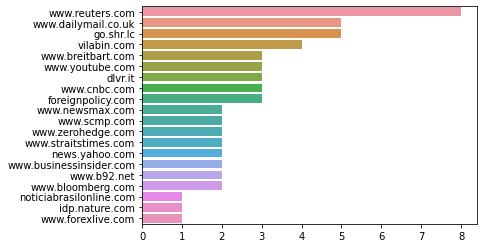

In [15]:
#https://stackoverflow.com/questions/44113335/extract-domain-from-url-in-python
#https://stackoverflow.com/questions/4201062/how-can-i-unshorten-a-url
#https://www.washingtontimes.com/ is 
def unshorten_url(url):
    parsed = urlp.urlparse(url)
    h = httplib.HTTPConnection(parsed.netloc)
    h.request('HEAD', parsed.path)
    response = h.getresponse()
    if response.status//100 == 3 and response.getheader('Location'):
        return response.getheader('Location')
    else:
        return url

list_df = df["entities"].tolist()
full_urls_list = []
just_domain_name = []
top_pages = []
for i in list_df:
    for j in i["urls"]:
        full_urls_list.append(j["expanded_url"])
        
for i in tqdm(full_urls_list):
    if "twitter" in i:
        continue
    temp = unshorten_url(i)
    just_domain_name.append(urlparse(temp).netloc)
    top_pages.append(temp)
    
counter_domain = Counter(just_domain_name)
counter = Counter(top_pages) 

x,y=map(list,zip(*counter_domain.most_common(20)))
sns.barplot(y,x)

n,c=map(list,zip(*counter.most_common(10)))
for i in zip (n,c):
    print(str(i[1]) + " " + str(i[0])+"\n")   
#x

# Reading ease 
### not sure how usefull this is

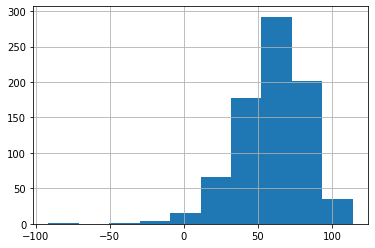

In [16]:
df["full_text"].apply(lambda x : flesch_reading_ease(x)).hist()
reading = df["full_text"].apply(lambda x : flesch_reading_ease(x))

# POS tagging

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
# sentence="The greatest comeback stories in 2019"
# tokens = word_tokenize(sentence)
# nltk.pos_tag(tokens)
# doc = nlp('Corona virus is the worst thing to happen to most people in this world')
# displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})


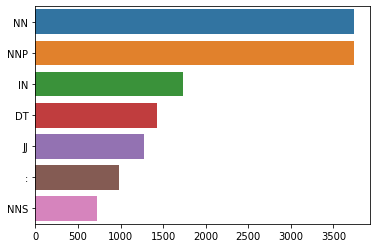

In [19]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags = df["full_text"].apply(lambda x : pos(x))
tags = [x for l in tags for x in l]
counter = Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

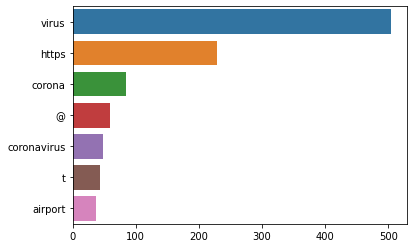

In [20]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj

words = df["full_text"].apply(lambda x : get_adjs(x))
words = [x for l in words for x in l]
counter = Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

In [21]:
count_machine = Counter([x for l in df['full_text'].str.split().tolist() for x in l])
print("There are "+str(len(count_machine.keys()))+" Unique words*")

There are 4760 Unique words*


# Topic modeling

In [22]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
def preprocess_tweets(df):
    corpus=[]
    
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    
    for news in df['full_text']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus = preprocess_tweets(df)
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [72]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.022*"http" + 0.010*"China" + 0.009*"..." + 0.007*"Wuhan" + 0.006*"Virus" + 0.006*"wonder" + 0.005*"live" + 0.005*"Welcome" + 0.005*"started" + 0.005*"coronavirus"'),
 (1,
  '0.021*"http" + 0.013*"China" + 0.009*"Wuhan" + 0.009*"infected" + 0.008*"got" + 0.007*"corona" + 0.007*"even" + 0.006*"bruh" + 0.006*"lmao" + 0.006*"computer"'),
 (2,
  '0.018*"corona" + 0.013*"scared" + 0.012*"asked" + 0.012*"since" + 0.011*"high" + 0.011*"airport" + 0.011*"worker" + 0.011*"Starbucks" + 0.011*"alert" + 0.011*"KKIA"'),
 (3,
  '0.018*"http" + 0.018*"China" + 0.015*"Wuhan" + 0.013*"Virus" + 0.010*"Corona" + 0.007*"Chinese" + 0.007*"This" + 0.006*"hospital" + 0.006*"case" + 0.006*"people"')]

In [73]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.085401  0.112347       1        1  33.167839
2      0.174605  0.020138       2        1  23.371901
1     -0.046087 -0.123251       3        1  23.124083
0     -0.043116 -0.009233       4        1  20.336176, topic_info=          Term       Freq      Total Category  logprob  loglift
736     scared  30.000000  30.000000  Default  30.0000  30.0000
734       high  27.000000  27.000000  Default  29.0000  29.0000
737     worker  26.000000  26.000000  Default  28.0000  28.0000
733      alert  26.000000  26.000000  Default  27.0000  27.0000
731  Starbucks  26.000000  26.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
38        know   6.286719  21.212666   Topic4  -5.7812   0.3766
561     corona   7.800069  69.639931   Topic4  -5.5655  -0.5964
769      first   5.972955  18.169415   Topic4  -5.8324   0.4803
598       case   6.443706  38.530109   Topic4  -5.7566  -0.1956
882     France   5.755233  19.285143   Topic4  -5.8696   0.3835

[241 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
783       3  0.928423  'escape
368       1  0.107860      ...
368       2  0.188755      ...
368       3  0.242685      ...
368       4  0.485369      ...
...     ...       ...      ...
737       2  0.977116   worker
638       1  0.180366    would
638       3  0.601221    would
638       4  0.180366    would
878       2  0.926209    🤷🏽‍♂️

[333 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

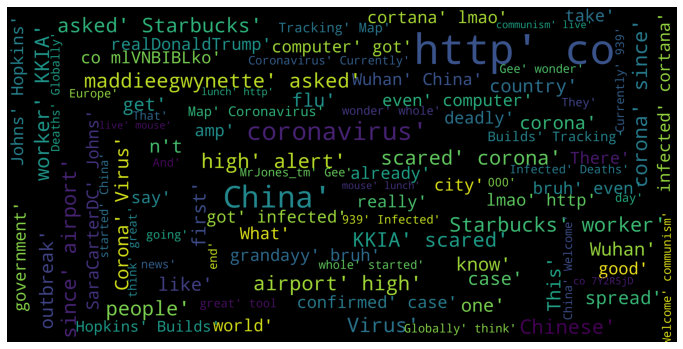

In [74]:
stopwords = set(STOPWORDS) # stop words like and and at will be removed

#so that they do not populate the word cloud
#print(stopwords)
#print(WordCloud.__doc__)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=90,
        max_font_size=25,
        scale=10,
        random_state=1)
    wordcloud = wordcloud.generate(str(data))
    wordcloud.normalize_plurals = True
    #print(type(wordcloud))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus)